<a href="https://colab.research.google.com/github/rtiwari6-stats/fraud-classifier/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#data exploration for fraud detection

#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraud-full.csv")

data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [67]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


In [68]:

data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

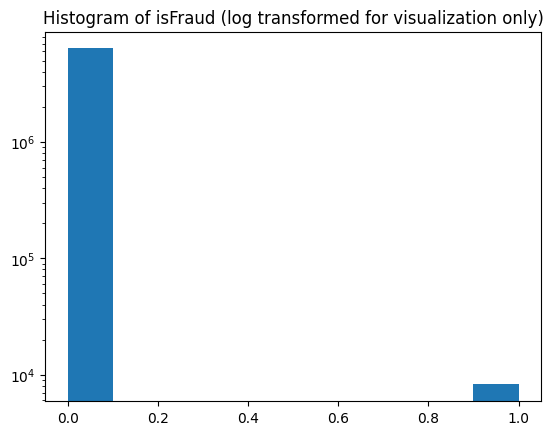

In [69]:
plt.yscale('log')
plt.hist(data["isFraud"])
plt.title("Histogram of isFraud (log transformed for visualization only)")
plt.show()

In [70]:
data['isFraud'].value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [71]:
data.drop(['isFlaggedFraud'], axis=1, inplace=True)
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0


In [72]:
# we have an unbalanced dataset so we use stratified sampling to ensure same distribution of
#fradulent transactions in training and test
#train-test split is 0.7:0.3

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(data, data["isFraud"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X = strat_train_set.drop("isFraud", axis=1)
y = strat_train_set["isFraud"].copy()

X_test = strat_test_set.drop("isFraud", axis=1)
y_test = strat_test_set["isFraud"].copy()




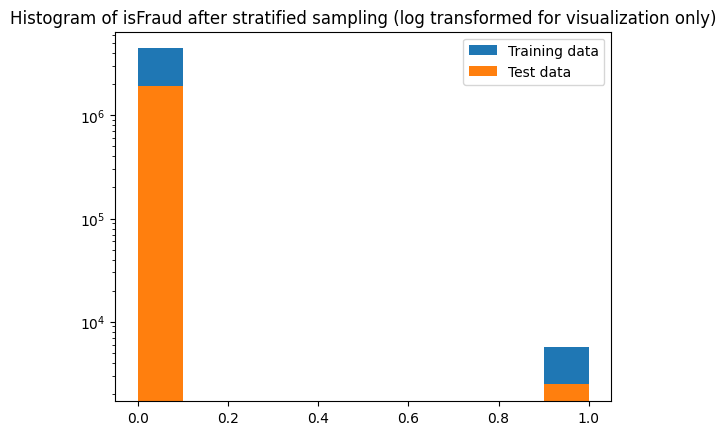

In [73]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.hist(strat_train_set["isFraud"], label="Training data")
plt.hist(strat_test_set["isFraud"], label="Test data")
plt.title("Histogram of isFraud after stratified sampling (log transformed for visualization only)")
plt.legend()
plt.show()

In [74]:
X.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

In [75]:
X['type'].value_counts()

CASH_OUT    1565926
PAYMENT     1506155
CASH_IN      979750
TRANSFER     373044
DEBIT         28959
Name: type, dtype: int64

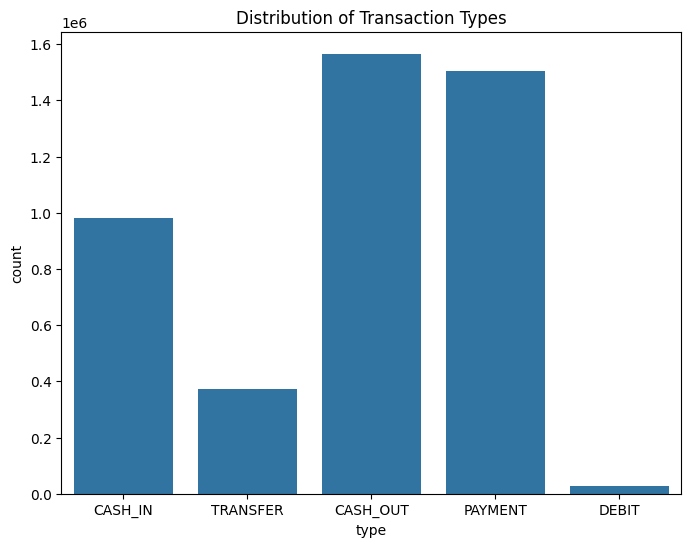

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=X)
plt.title('Distribution of Transaction Types')
plt.show()

In [77]:
print(data[['type','isFraud']].value_counts())


type      isFraud
CASH_OUT  0          2233384
PAYMENT   0          2151495
CASH_IN   0          1399284
TRANSFER  0           528812
DEBIT     0            41432
CASH_OUT  1             4116
TRANSFER  1             4097
dtype: int64


type
CASH_OUT    2882
TRANSFER    2867
dtype: int64


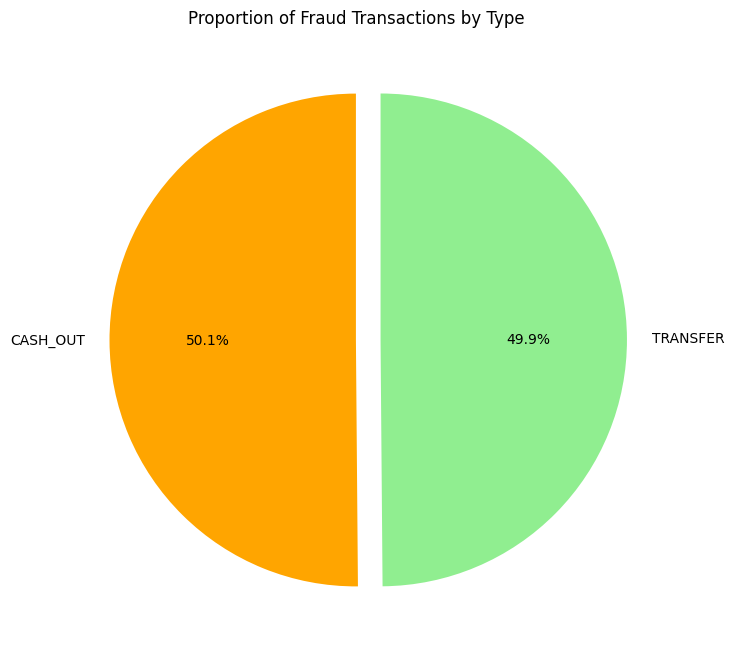

In [78]:
fraud_transactions = X[y == 1]
fraud_counts_by_type = fraud_transactions.groupby('type').size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

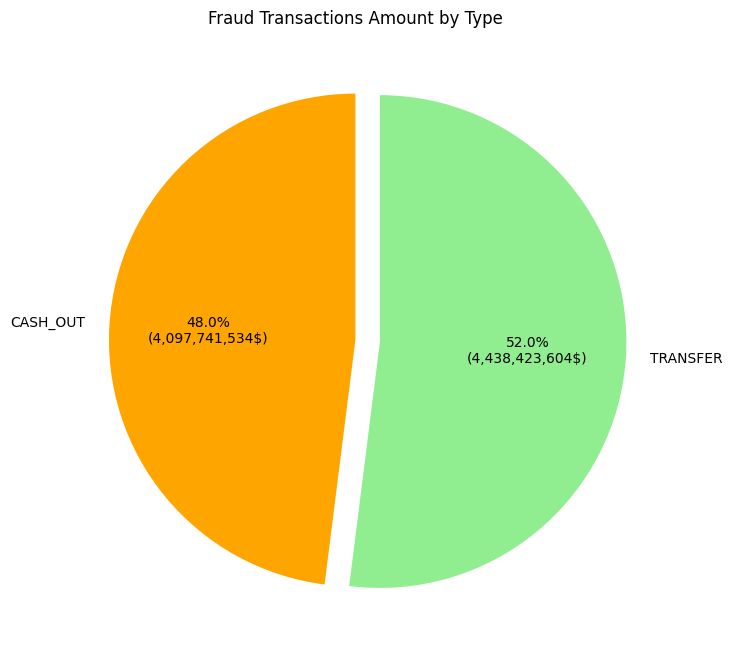

In [79]:
fraud_amounts_by_type = X[y == 1].groupby("type")["amount"].sum()
plt.figure(figsize=(8, 8))
plt.pie(fraud_amounts_by_type, labels=fraud_amounts_by_type.index,
        autopct=lambda p: f'{p:.1f}%\n({p * sum(fraud_amounts_by_type) / 100:,.0f}$)', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Fraud Transactions Amount by Type')
plt.show()

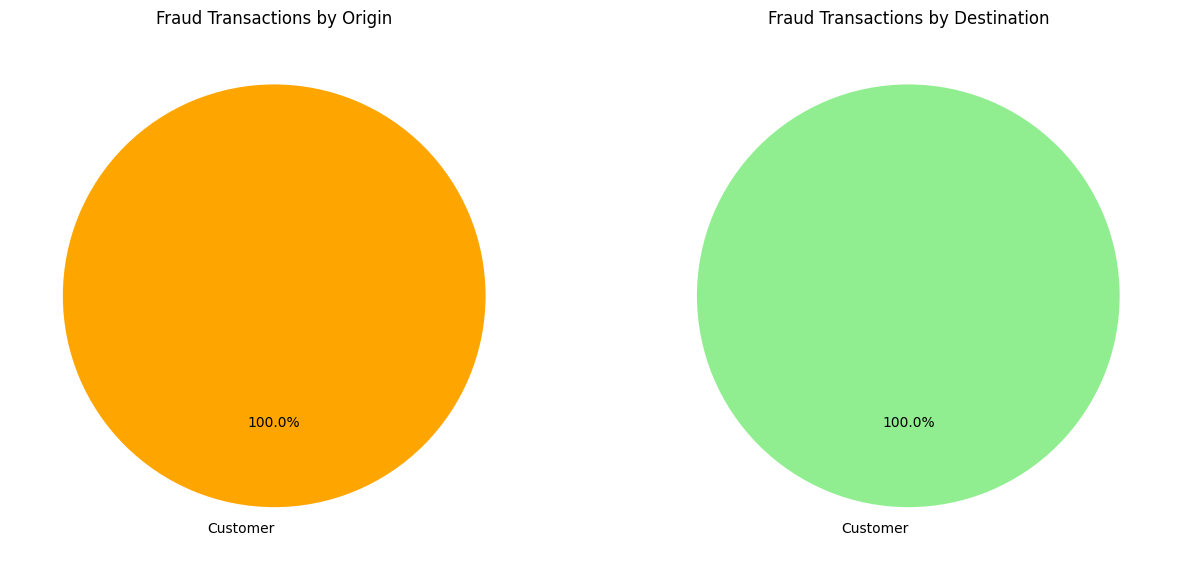

In [80]:
fraud_transactions = X[y == 1].copy()
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrg_first_letter'].replace('C', 'Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C', 'Customer')
fraud_by_name_orig_first_letter = fraud_transactions.groupby('nameOrg_first_letter').size()
fraud_by_name_dest_first_letter = fraud_transactions.groupby('nameDest_first_letter').size()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(fraud_by_name_orig_first_letter, labels=fraud_by_name_orig_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['orange'])
axes[0].set_title('Fraud Transactions by Origin')

axes[1].pie(fraud_by_name_dest_first_letter, labels=fraud_by_name_dest_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['lightgreen'])
axes[1].set_title('Fraud Transactions by Destination')

plt.show()

In [65]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Statistics about amounts for non-fraud transactions:\n",
      pd.DataFrame.describe(X[y == 0].amount), "\n")
print("Statistics about amounts for fraud transactions:\n",
      pd.DataFrame.describe(X[y == 1].amount), "\n")

Statistics about amounts for non-fraud transactions:
 count    4,448,085.00
mean       178,253.23
std        594,238.83
min              0.01
25%         13,367.20
50%         74,639.92
75%        208,291.17
max     92,445,516.64
Name: amount, dtype: float64 

Statistics about amounts for fraud transactions:
 count        5,749.00
mean     1,484,808.69
std      2,409,643.17
min              0.00
25%        127,447.68
50%        452,261.67
75%      1,555,182.41
max     10,000,000.00
Name: amount, dtype: float64 

